In [31]:
import pandas as pd

In [32]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [33]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [34]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [35]:
cols_to_norm =  ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [36]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x : (x - x.min()) / (x.max() - x.min()))

In [37]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [38]:
import tensorflow as tf

In [39]:
diabetes.columns 

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [40]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [41]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A','B','C','D'])

In [42]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

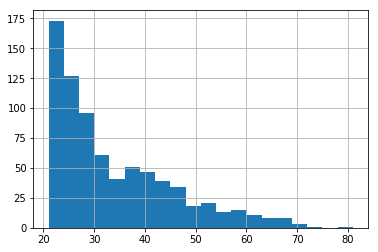

In [44]:
diabetes['Age'].hist(bins=20)

In [45]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [46]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree, assigned_group, age_buckets]

### Train Test Split

In [47]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [48]:
x_data = diabetes.drop('Class', axis=1)

In [49]:
x_data

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C
5,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,30,A
6,0.176471,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,26,C
7,0.588235,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,29,A
8,0.117647,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,53,D
9,0.470588,0.628141,0.786885,0.000000,0.000000,0.000000,0.065756,54,A


In [50]:
labels = diabetes['Class']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

### Input Function

In [53]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000,
                                                shuffle=True)

### Creating the Model

In [54]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Tianran\\AppData\\Local\\Temp\\tmp2e86398n', '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': 1, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_save_summary_steps': 100, '_session_config': None, '_log_step_count_steps': 100}


In [55]:
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Tianran\AppData\Local\Temp\tmp2e86398n\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 309.93
INFO:tensorflow:loss = 7.9602876, step = 101 (0.326 sec)
INFO:tensorflow:global_step/sec: 347.657
INFO:tensorflow:loss = 4.5602627, step = 201 (0.289 sec)
INFO:tensorflow:global_step/sec: 390.263
INFO:tensorflow:loss = 5.635555, step = 301 (0.256 sec)
INFO:tensorflow:global_step/sec: 372.578
INFO:tensorflow:loss = 4.618998, step = 401 (0.266 sec)
INFO:tensorflow:global_step/sec: 399.639
INFO:tensorflow:loss = 5.7222896, step = 501 (0.250 sec)
INFO:tensorflow:global_step/sec: 463.662
INFO:tensorflow:loss = 4.5636644, step = 601 (0.215 sec)
INFO:tensorflow:global_step/sec: 469.106
INFO:tensorflow:loss = 4.303813, step = 701 (0.213 sec)
INFO:tensorflow:global_step/sec: 459.555
INFO:tensorflow:loss = 5.211737, step = 801 (0.221 sec)
INFO:tensorflow:global_step/s

In [56]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test,batch_size=10,
                                                     num_epochs=1, shuffle=False)

In [58]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-02-03-09:02:51
INFO:tensorflow:Restoring parameters from C:\Users\Tianran\AppData\Local\Temp\tmp2e86398n\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-02-03-09:02:53
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.72727275, accuracy_baseline = 0.64935064, auc = 0.8056791, auc_precision_recall = 0.6471213, average_loss = 0.5236117, global_step = 1000, label/mean = 0.35064936, loss = 5.039763, prediction/mean = 0.34475347


In [59]:
results

{'accuracy': 0.72727275,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8056791,
 'auc_precision_recall': 0.6471213,
 'average_loss': 0.5236117,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.039763,
 'prediction/mean': 0.34475347}

In [60]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1,
                                                     shuffle=False)

In [61]:
predictions = model.predict(pred_input_func)

In [62]:
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from C:\Users\Tianran\AppData\Local\Temp\tmp2e86398n\model.ckpt-1000


In [63]:
my_pred

[{'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.4880162], dtype=float32),
  'logits': array([-0.04794455], dtype=float32),
  'probabilities': array([0.5119839, 0.4880162], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.606639], dtype=float32),
  'logits': array([0.43320608], dtype=float32),
  'probabilities': array([0.39336103, 0.606639  ], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.33247095], dtype=float32),
  'logits': array([-0.69703037], dtype=float32),
  'probabilities': array([0.66752905, 0.33247095], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.3171175], dtype=float32),
  'logits': array([-0.7670504], dtype=float32),
  'probabilities': array([0.6828825, 0.3171175], dtype=float32)},
 {'class_ids':

### DNN Classifier

In [64]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Tianran\\AppData\\Local\\Temp\\tmp2ci432kn', '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': 1, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_save_summary_steps': 100, '_session_config': None, '_log_step_count_steps': 100}


In [65]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [66]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree, embedded_group_col, age_buckets]

In [67]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [68]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Tianran\\AppData\\Local\\Temp\\tmp24u9u60b', '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': 1, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_save_summary_steps': 100, '_session_config': None, '_log_step_count_steps': 100}


In [69]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Tianran\AppData\Local\Temp\tmp24u9u60b\model.ckpt.
INFO:tensorflow:loss = 8.765177, step = 1
INFO:tensorflow:global_step/sec: 272.728
INFO:tensorflow:loss = 5.8293204, step = 101 (0.371 sec)
INFO:tensorflow:global_step/sec: 362.032
INFO:tensorflow:loss = 4.1170874, step = 201 (0.276 sec)
INFO:tensorflow:global_step/sec: 388.738
INFO:tensorflow:loss = 7.459669, step = 301 (0.257 sec)
INFO:tensorflow:global_step/sec: 398.883
INFO:tensorflow:loss = 4.5445833, step = 401 (0.251 sec)
INFO:tensorflow:global_step/sec: 366.655
INFO:tensorflow:loss = 5.0846233, step = 501 (0.273 sec)
INFO:tensorflow:global_step/sec: 368.029
INFO:tensorflow:loss = 6.5636225, step = 601 (0.271 sec)
INFO:tensorflow:global_step/sec: 424.267
INFO:tensorflow:loss = 4.756347, step = 701 (0.235 sec)
INFO:tensorflow:global_step/sec: 444.085
INFO:tensorflow:loss = 6.3616395, step = 801 (0.225 sec)
INFO:tensorflow:global_ste

In [70]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [71]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-02-03-09:15:22
INFO:tensorflow:Restoring parameters from C:\Users\Tianran\AppData\Local\Temp\tmp24u9u60b\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-02-03-09:15:24
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7316017, accuracy_baseline = 0.64935064, auc = 0.8223457, auc_precision_recall = 0.69017845, average_loss = 0.5018438, global_step = 1000, label/mean = 0.35064936, loss = 4.8302464, prediction/mean = 0.38637877


{'accuracy': 0.7316017,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8223457,
 'auc_precision_recall': 0.69017845,
 'average_loss': 0.5018438,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.8302464,
 'prediction/mean': 0.38637877}